In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Experiment

In [58]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        super(MyDataset, self).__init__()
        
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

EXP = 1
class Model(nn.Module):
    def __init__(self, a=0.5, b=0.5):
        super(Model, self).__init__()
        self.w1 = torch.nn.Parameter(torch.tensor(float(a)))
        self.w2 = torch.nn.Parameter(torch.tensor(float(b)))
        
        self.w_history = [(self.w1.item(), self.w2.item())]
        self.loss_history = []
        
        
    def forward(self, x):
        return self.w2 * torch.tanh((self.w1 -1) * x) * torch.tanh((self.w1 + 1)**EXP * x) * torch.tanh((self.w2 - (self.w1 + 1)**2) * x)

def train(dataloader, model, loss_fn, optimiser):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        model.w_history.append((model.w1.item(), model.w2.item()))
        model.loss_history.append(loss.item())
    return

            
            
def test(dataloader, model, loss_fn):
    return 
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader: 
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    return


Using cpu device


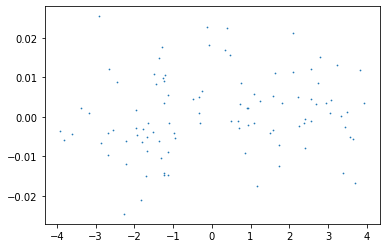

In [167]:

w_true = (1.5, 0.00)
model_true = Model(*w_true).to(device)

n = 100
X_train =  (torch.rand(n) - 1/2) * 8 # Uniform(-1, 1)
noise = torch.randn(n) * 0.01
y_train = model_true(X_train) + noise
training_data = MyDataset(X_train.detach().numpy(), y_train.detach().numpy())

# n_test = 100
# X_test = (torch.rand(n_test) - 1/2 * 10)
# noise_test = torch.randn(n_test)
# y_test = model_true(X_test) + noise_test
# testing_data = MyDataset(X_test, y_test)


batch_size = 5

train_dataloader = DataLoader(training_data, batch_size=batch_size)
# test_dataloader = DataLoader(testing_data, batch_size=batch_size)

plt.scatter(X_train.detach().numpy(), y_train.detach().numpy(), s=0.5)


Finished: w=[-1.79   0.625], w_init=(-1.8, 0.9), w0=(1.5, 0.0)
Finished: w=[-1.527 -0.003], w_init=(-1.8, -0.9), w0=(1.5, 0.0)
Finished: w=[-1.001  0.798], w_init=(-1.3, 0.9), w0=(1.5, 0.0)
Finished: w=[-1.001 -0.807], w_init=(-1.3, -0.9), w0=(1.5, 0.0)
Finished: w=[-1.     0.856], w_init=(-0.8, 0.9), w0=(1.5, 0.0)
Finished: w=[-1.    -0.857], w_init=(-0.8, -0.9), w0=(1.5, 0.0)
Finished: w=[-0.205  0.631], w_init=(-0.1, 0.9), w0=(1.5, 0.0)
Finished: w=[-0.212  0.002], w_init=(-0.1, -0.9), w0=(1.5, 0.0)
Finished: w=[0.999 0.57 ], w_init=(0.5, 0.9), w0=(1.5, 0.0)
Finished: w=[ 1.001 -0.593], w_init=(0.5, -0.9), w0=(1.5, 0.0)
Finished: w=[0.999 0.814], w_init=(1.3, 0.9), w0=(1.5, 0.0)
Finished: w=[ 1.001 -0.814], w_init=(1.3, -0.9), w0=(1.5, 0.0)
Finished: w=[ 1.751 -0.002], w_init=(1.9, 0.9), w0=(1.5, 0.0)
Finished: w=[ 1.752 -0.002], w_init=(1.9, -0.9), w0=(1.5, 0.0)


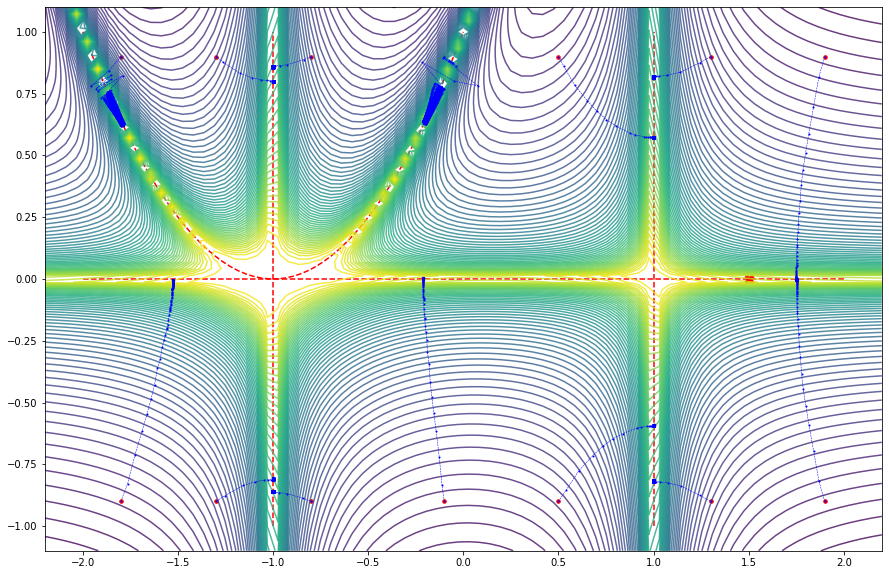

In [168]:
epochs = 100
loss_fn = nn.MSELoss()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.scatter([w_true[0]], [w_true[1]], s=80, color="red", marker="X")
ax.vlines([-1, 1], ymin=-1, ymax=1, linestyles="dashed", color="red")
ax.hlines([0], xmin=-2, xmax=2, linestyles="dashed", color="red")
ax.plot(np.linspace(-2, 0), (np.linspace(-2, 0) + 1)**2, "r--")

d = 0.00
xmin, xmax = ax.get_xlim()
xmin -= d
xmax += d

ymin, ymax = ax.get_ylim()
ymin -= d
ymax += d

w1_axis = np.linspace(xmin, xmax, num=80)
w2_axis = np.linspace(ymin, ymax, num=80)
W1, W2 = np.meshgrid(w1_axis, w2_axis)
Z = np.array(
    [(W2 * np.tanh((W1 - 1) * xval) * np.tanh((W1 + 1) **EXP * xval) * np.tanh((W2 - (W1 + 1)**2) * xval) - yval)**2 
     for xval, yval in zip(X_train.detach().numpy(), y_train.detach().numpy())]
).mean(axis=0)

ax.contour(W1, W2, -np.log(Z), levels=80, alpha=0.8)

# a = -0.8
# b = -0.7
# a, b = (np.random.rand(2) - 1/2) * 3

for a in [-1.8, -1.3, -0.8, -0.1, 0.5, 1.3, 1.9]:
    for b in [0.9, -0.9]:
        ax.scatter([a], [b], s=50, color="red", marker=".")
        model = Model(a, b).to(device)
        optimiser = torch.optim.SGD(model.parameters(), lr=1e-1)

        for t in range(epochs):
            train(train_dataloader, model, loss_fn, optimiser)
        #     test(test_dataloader, model, loss_fn)

        hs = np.array(model.w_history)
        w_pred = hs[-1]
        print(f"Finished: w={np.around(w_pred, 3)}, w_init={(a, b)}, w0={w_true}")

#         print(f"Number of steps = {len(hs)}")
#         print(f"initial weights: {hs[0]}")
#         print(f"predicted weights: {w_pred}")
#         print(f"true weights    : {w_true}")

        ax.plot(hs[:, 0], hs[:, 1], linestyle='--', marker='o', color='b', linewidth=0.5, markersize=1)
        ax.scatter([w_pred[0]], [w_pred[1]], s=30, color="black", marker=".")




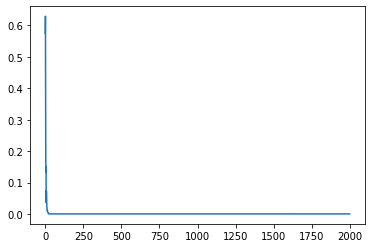

In [166]:
plt.plot(model.loss_history)